University of Michigan - ROB 101 Computational Linear Algebra

# Homework 6: Vector Space, Subspaces and Operations
### Due 10/22 at 9 PM Eastern

#### Purpose: Use the Grahm-Schmidt process to build towards QR factorization.  Use QR factorization to create regression fits.
- Skills
    - Function building:  using functions within other functions
    - Building orthogonal and orthonormal bases via Gram-Schmidt
- Knowledge
    - How the null space of a matrix is computed
    - Building confidence with plotting large amounts of data

### Problem 1. Building Towards QR factorization

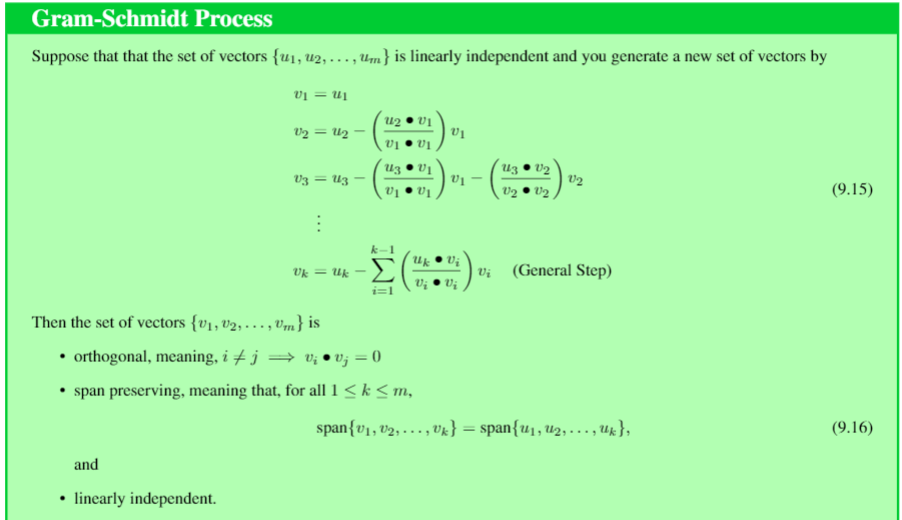

### a) Use the Grahm-Schmidt Process to build orthonormal vectors
Above is the Grahm-Scmidt Process algorithm taken from the ROB 101 booklet.
$$u1 = \begin{bmatrix}-1\\1\\-1\\1\end{bmatrix}, u2 = \begin{bmatrix}-1\\3\\-1\\3\end{bmatrix} u3 = \begin{bmatrix}1\\3\\5\\7\end{bmatrix}$$

In [ ]:
#Step 1 is done for you: declare u1, u2 and u3
u1 = [-1;1;-1;1]
u2 = [-1;3;-1;3]
u3 = [1;3;5;7]

In [ ]:
#Step 2: Apply Gram-Schmidt to {u1, u2, u3} so as to compute three orthognal vectors, v1, v2, and v3 
# At this stage, you should NOT normalize the vectors to having length one.
using LinearAlgebra 
#dot(u, v) performs the dot product 

# your code here
throw(ErrorException())

In [ ]:
# Friendly self test
T1 = @assert(abs(norm(v1) -norm(u1)) < 1e-10 )
T2 = @assert(abs(norm(v2) -2.0) < 1e-10 )
T3 = @assert(abs(norm(v3) -4.0) < 1e-10 )
println("all nothings means likely correct")
[T1 T2 T3]

In [ ]:
#autograder cell
# We will be testing vBasis: thus you MUST name your orthogona vectors v1, v2, and v3
vBasis = [v1 v2 v3]

### b)  Normalize your vectors v1, v2 and v3 to form an orthonormal basis
Use the norm() function of the Linear Algebra package to return the magnitude, ||v|| , of the vector.  Since normalizing is so easy in code, we will generally do it right off the bat.

In [ ]:
#Normalize v1, v2 and v3 and save in v1norm, v2norm and v3norm
v1norm = v1/norm(v1)
#You do the rest
# your code here
throw(ErrorException())

In [ ]:
# We will be testing Vnormalized: thus you MUST name your orthogona vectors v1norm, v2norm, and v3norm

Vnormalized=[v1norm v2norm v3norm]
# Friendly self test
T1 = @assert(maximum(abs.(Vnormalized)) - minimum(abs.(Vnormalized)) < 1e-10 )
println("all nothings means likely correct")
[T1]

In [ ]:
# We will be testing vNormBasis: thus you MUST name your orthogona vectors v1norm, v2norm, and v3norm

#autograder cell
vNormBasis = [v1norm v2norm v3norm]

###  Example 1: Because normalizing is so easy in code, we usually integrate it directly into the Gram-Schmidt Process to produce orthornormal vectors as we go. Check this out!

In [ ]:
using LinearAlgebra 
#dot(A, B) takes the dot product 

u1 = [1; 2; 3; 4; 5]
u2 = [6; 7; 8; 9; 10]
u3 = [11; 12; 13; 14; 14]


# Initialization
v1 = u1
v1=v1/norm(v1)

# Remove the part of u2 the lie in the direction of v1
v2 = u2 - (dot(u2,v1)/dot(v1, v1))*v1
# Thinking ahead: could you compute v2 with a for loop of length 1?
v2=v2/norm(v2)

# Remove the parts of u3 that lie in the directions of both v1 and v2
v3 = u3 - (dot(u3,v1)/dot(v1, v1))*v1 - (dot(u3,v2)/dot(v2, v2))*v2
# Thinking ahead: could you compute v3 with a for loop of length 2? 
# Why length 2? How long is the summation in (9.15) at the top of the notebook?
v3=v3/norm(v3)

# Thinking ahead: what would the computation of a v4 look like? And then a v99? 
# v99 = u99 - the parts of u99 that lie in the directions of v1, v2, ...., v98
# Yeah, a for loop would be good! 
    
#The summation in (9.15) is screaming "I am a for loop!"
println("Sweet!")
V= [v1 v2 v3]

### Problem 2.  Build a Grahm-Schmidt function that produces an orthonormal basis
Hint: Check out the General step shown in the Grahm-Schmidt algorithm taken from the ROB 101 booklet.  Think about how you can use code to repeat that step in order to find the orthogonal basis.  Remember to normalize as we did above!

For simplicity, your function will take the vectors stacked as the columns of a matrix U and output the orthonormal vectors as the columns of a matrix V, just as we did above.

In [ ]:
#Build your function here! We will give you a shell that you are to complete
function grahm_schmidt(U)
    # We assume the columns of U are linearly independent. Why?
    # Because, with this assumption, norm(vk) will never be zero
    # start a blank matrix V which will hold all of the output vectors
    (rows, cols) = size(U)
    V = Array{Float64,2}(undef, rows, cols)
    #start a for loop that runs the number of times that there are columns in U
    for k in 1:cols
        #insert the general step of Gram-Schmidt here.  You will need another for loop to evaluate the summation
        # your code here
        throw(ErrorException())
    end
    return V
end     

In [ ]:
# Friendly self test
using Random
Random.seed!(2021)
U = rand(12, 12)
solTest = grahm_schmidt(U)
T1 = @assert(norm(solTest'*solTest - I) < 1e-10 )
println("all nothings means likely correct")
[T1]

In [ ]:
#test 1
U = [-1 -1 1; 1 3 3 ; -1 -1 5; 1 3 7]
a2Test1 = grahm_schmidt(U)
#should be the same answer that you got for v1norm, v2norm, and v3norm in Problem 1 

In [ ]:
#test 2
Random.seed!(1999)
Ubig = rand(100, 27)
sol2a = grahm_schmidt(Ubig)

### Problem 3.  Dependent Vectors
In Problem 2, we assumed that the given vectors were linearly independent. This will not always be the case.  Walk through the Grahm Schmidt process for vectors d1, d2 and d3, and identify where the process goes wrong.  Look back at Problem 1 part (a) for an example of how to walk through Grahm-Schmidt.
$$ d1 =  \begin{bmatrix}1\\0\end{bmatrix} , d2 = \begin{bmatrix}0\\1\end{bmatrix} , d3 = \begin{bmatrix}2\\7\end{bmatrix} $$

In [ ]:
#We declare the d vectors for you
d1 = [1;0]
d2 = [0;1]
d3 = [2;7]

In [ ]:
#Construct your orthogonal basis
#DO NOT NORMALIZE HERE!!
v_1 = ???
v_2 = ???
v_3 = ???

In [ ]:
#Normalize here
vnorm1 = ???
vnorm2 = ???
vnorm3 = ???

### a) Where did we run into an error? 
Write a sentence explaining what happened, and how we can fix it so that we can still create a set of orthonormal linearly independent vectors from an initial set of vectors that is necesssarily linearly independent.
YOUR ANSWER HERE

In this way, we can use the Grahm-Schmidt process to tell us if a set of vectors is linearly independent.  Essentially, we walk through the steps of Grahm-Schmidt on each vector until we get to one where $ \Vert v_k \Vert \approx 0 $.  If this is the case, then we know that $$u_k \in \operatorname{span}\{u_1, ... , u_{k-1}\} = \operatorname{span}\{v_1, ... , v_{k-1}\}$$ To say it a different way, $u_k$ added to the set $\{u_1, ... , u_{k-1}\}$ causes the set $\{u_1, ... , u_{k}\}$ to be linearly dependent. Hence, we should throw it away when peforming the Gram-Schmidt process and move on to the next vector, $u_{k+1}$ and see if the set  $\{u_1, ... , u_{k-1}, u_{k+1}\}$ is linearly independent. 

Make sense? When we encounter a dependent vector, we throw it away and move onto the next vector until we exhaust our set of vectors.

### b.  Skip the dependent vector and form an orthonormal set of vectors from the vectors {d1, d2, d3} given above

In [ ]:
#Remove the dependent vector, and use the other two to create the orthonormal basis
#Output the orthonormal basis in a matrix called orthonormalMatrix

# your code here
throw(ErrorException())

In [ ]:
#autograder cell

### We can also do this in a `for loop`, on larger sets of vectors.  Our goal below is to remove vectors that we "do not want", just as you will need to do with the "linearly dependent vectors" that Gram-Schmidt finds problematic! 

In [ ]:
#Example where we are removing certain "bad" vectors
v1=[1; 1 ;1.0] 
V=rand(3,8)
V[:,1]=v1; V[:,5]=pi*v1; V[:,7]=-4*v1 # set several of the columns of V equal to multiples of v1

# Goal: remove all vectors that are linearly dependent on v1 and keep the rest of them
(nrows, ncols) = size(V)
U = Array{Float64,2}(undef, nrows, 0) # no columns, yikes! U now exists as an emptry array
U=[U v1]
for k = 2:ncols
    vk=V[:,k] #check each column vector in V
    vk=vk-(dot(vk,v1)/dot(v1,v1))*v1 #subtract off the component vk in the direction of v1, as done in GS
    test=norm(vk) #check the length of vk
    if test > 1e-8 #if it is non zero 
        U=[U vk] #add it to the matrix U
    end
end
println("Did we remove all of the columns that were multiples of v1? ")
U # afer v1, this does not show any columns that are multiples of [1;1;1], so we removed what we wanted to remove!

### Problem 4. Create a version of Gram-Schmidt that produces orthonormal vectors and eliminates linearly dependent vectors. 
Hint: Use the code from your first grahm_schmidt function, but make sure to check that you are not dividing by zero before you add another vector to the orthonormal basis.

In [ ]:
#Build this new function so that it removes the dependent vectors along the way.
function grahm_schmidt_deps(U)
    (rows, cols) = size(U)
    #start a blank matrix V which will hold the linearly independent orthonormal vectors
    V = Array{Float64,2}(undef, rows, 0)
    #start a for loop that runs the number of times that there are columns in U
    for k in 1:cols
        #perform grahm-schmidt on U, by sequentially removing the parts of vectors the lie
        # in the directions of vectors stored in V
        # Only add a vector to V if it is non-zero in length after the above step
        # Final hint, the first time through the for loop, size(V,2) = 0
   
        # your code here
        throw(ErrorException())
        
    end
    return V
end     

In [ ]:
# Friendly self test
using Random
Random.seed!(2021)
U = rand(12, 20)
solTest = grahm_schmidt_deps(U)
T1 = @assert(norm(solTest'*solTest - I) < 1e-10 )
println("all nothings means likely correct")
[T1]

In [ ]:
aTest = [0 2 4; 2 0 14]
aAns = grahm_schmidt_deps(aTest)

## QR factorization from the grahm-schmidt process
<img src = "https://i.postimg.cc/hGLpSYG9/QR.jpg" width = "800" >

Now that we can make an orthonormal basis from a set of linearly independent vectors, or a matrix with independent columns, we can compute the QR factorization.  We already have the Q factor!  This section taken from the ROB 101 booklet explains how to find R.

### Structured return and QR factorization

Recall how julia managed LU factorization with the lu() function: it returned a data structure, or *struct*, containing the lower triangular matrix, upper triangular matrix, and (optionally) the permutation matrix. We will do the same with our QR factorization function, which will make our function's return values easy to access.

## A brief refresher on structured return

For our purposes, a data structure or *struct*, is simply an object which contains multiple pieces of data which can then be easily accessed by their handle. For example, let us define a struct named newStruct with data members x, y, z:

In [ ]:
struct newStruct
    x
    y
    z
end

The order of those data members is important! When we make our data structure, we can use the following syntax:

In [ ]:
my_struct = newStruct(1, 2, 3)
@show my_struct.x

Because <code>x</code> was listed first in our struct <code>newStruct</code>, it is initialized with a value of 1 because in the call <code>my_struct = newStruct(1,2,3)</code> 1 is listed first.

We will give you a predefined struct in Problem 5 which you will populate in your <code>qr_fact()</code> function.

### Problem 5.  QR
### a) Using your function for the Grahm-Schmidt process, write a function that returns the QR factorization of a matrix with independent columns
Your function should return both the Q and R factors in the QR struct.

Hint:  If you use your grahm_schmidt_deps function, the error checks for dependent vectors will be built into your QR function.

In [ ]:
struct QR
    Q
    R
end

function qr_fact(A)
    #Calculate and declare Q and R
    # your code here
    throw(ErrorException())
end

In [ ]:
# Friendly self test
Random.seed!(2525)
M = rand(20, 12)
F = qr_fact(M)
T1 = @assert(norm(F.Q'*F.Q - I) < 1e-10 )
T1 = @assert(norm(F.Q*F.R - M) < 1e-10 )
println("all nothings means likely correct")
[T1 T2]

In [ ]:
myAns = qr_fact([-1 -1 1; 1 3 3 ; -1 -1 5; 1 3 7])

In [ ]:
##Forward and Back substitution functions from HW04

#This is a back substitution function.  It solves for x in an equation Ux = b, where U is upper triangular.
function backwardsub(U, b)
    n = length(b)
    x = Vector{Float64}(undef, n) 
    x[n] = b[n]/U[n,n]
    for i in n-1:-1:1
        x[i]=(b[i]- (U[i,(i+1):n])' *x[(i+1):n] )./U[i,i]
    end
    return x
end

#This is a forward substitution function
function forwardsub(L, b)
    n = length(b)
    x = Vector{Float64}(undef, n); 
    x[1] = b[1]/L[1,1] 
    for i = 2:n 
        x[i]=(b[i]- (L[i,1:i-1])' *x[1:i-1] )./L[i,i] 
    end
    return x
end

### b) Use QR factorization to solve $Ax = b$  for a large (50x50) system of equations
<img src =  "https://i.postimg.cc/QtBJTh8B/QR-solving.jpg" width = 800>

Use the steps provided in the ROB 101 booklet, and your functions to solve.  A and b are declared for you.

In [ ]:
#Run this to declare A and b
Random.seed!(101)
A = 10*rand(50, 50);
b = 10*rand(50,1);

In [ ]:
#First check that the determinant of A is nonzero
det(A) != 0

In [ ]:
#Then, factor A into Q and R and store the result in F using the QR struct
Q = F.Q
R = F.R

In [ ]:
#Now compute b_bar, as shown in the above textbook excerpt
b_bar = 

In [ ]:
#Solve Rx = b_bar for x.  Store x in a variable x_QR
#hint: use the provided backwardsub() function
# your code here
throw(ErrorException())

In [ ]:
# Friendly self test
T1 = @assert(norm(A*x_QR - b) < 1e-10 )
println("all nothings means likely correct")
[T1]

In [ ]:
#autograder cell

### c) Check your answer against an LU factorization method
We're going to build your faith in solving via QR factorization by showing you that it produces the same results as solving via LU factorization! Use the forwardsub() and backwardsub() functions provided.

In [ ]:
#Solve for x using LU and store your answer in a variable x_LU
# your code here
throw(ErrorException())

In [ ]:
# Friendly self test
test=norm(x_QR- x_LU)
T1 = @assert(test < 1e-9 )
println("For the record norm(x_QR- x_LU) = $test")
println("all nothings means likely correct.")
[T1]

In [ ]:
# QR performs worse because we are not using the best numerical method to implement GS
[norm(A*x_QR-b)  norm(A*x_LU-b)]

#### Computing the null space of a matrix using Grahm-Schmidt

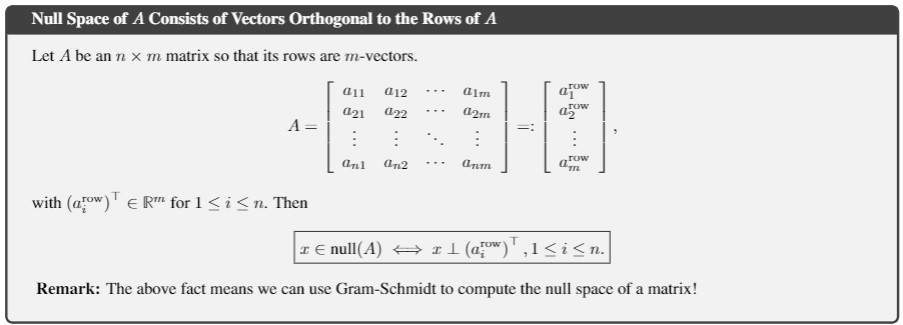

In [ ]:
# Let's check the above on an example
Random.seed!(102)
A = randn(4, 6);
V=nullspace(A)

In [ ]:
# Run me, don't change me
for k = 1:size(A,1)
    Arow=A[k,:] # in Julia, this transposes the row into a column :-)
    for ell = 1:size(V,2)
        vNull=V[:,ell]
        @show dot(Arow,vNull)
    end
end
println("Compare to what we expected from the big grey box.")

#### Fact: If you apply your version of GS that handles dependent vectors to the columns of $\left[ \left(A_{n \times m}\right)^\top~~~~~I_m  \right]$, the output will be an orthogonal basis for the columns of $A^\top$ followed by an orthogonal basis for the null space of $A$

In [ ]:
# run me, don't change me. I assume that your function `grahm_schmidt_deps` actually works. :-(
function myNullSpace(A)
    V1 = grahm_schmidt_deps(A')
    numLinIndepColsAtranspose = size(V1,2)
    V = grahm_schmidt_deps([A' I])
    V=V[:,1+numLinIndepColsAtranspose:end]
    return V
end

### Problem 6: Explain the logic of the function ```myNullSpace```. Consider: How does it reflect the process discussed in the textbook? What will the function actually return? Why is the function structured with 2 calls to ```grahm_schmidt_deps```?

YOUR ANSWER HERE

In [ ]:
# Run me don't change me
function cleanUp(A,tol=1e-10)
    # Zero out small entries of a matrix or vector
    B=copy(A)
    indicesSmall=findall(x->x<tol, abs.(B))
    B[indicesSmall]=0.0*B[indicesSmall]
return B
end
# Test case
using Random
Random.seed!(1957)
A = randn(4, 7)
V = myNullSpace(A)
cleanUp(A*V)

#### Here is an alternative null space implementation based on the Modified Gram Schmidt Process you created!

In [ ]:
struct myNull
    nullSpace
    dimColSpan
    dimNullSpace
    V
end

function myNullSpace(A)
    n,m=size(A)
    M=[copy(A') I]
    V=Array{Float64,2}(undef,m,0)
    epsilon=1e-8
    i=0
    # Build an orthonormal basis for the column span of transpose(A)  
    # This algorithm uses the Modified Gram Schmidt Process
    for k = 1:n
        vi=M[:,k]
        for j=1:i
          vi= vi-(vi'*V[:,j])*V[:,j]
        end
        norm_vi=sqrt(vi'*vi)
        if norm_vi > epsilon
            V=[V vi/norm_vi]
            i=i+1
        end            
    end
    dimColSpan=i
    # Now, we complete the above basis for the column span to a basis for all of R^m. 
    # Gram-Schmidt will make sure that these extra vectors are orthonormal to 
    # the column span of transpose(A), and hence they form a basis for null space of A
    for k = n+1:n+m
        vi=M[:,k]
        for j=1:i
          vi= vi-(vi'*V[:,j])*V[:,j]
        end
        norm_vi=sqrt(vi'*vi)
        if norm_vi > epsilon
            V=[V vi/norm_vi]
            i=i+1
        end            
    end
    # We could easily have combined the two for loops, but we separated them to help you
    # understand what is being done at each part of the computations
    dimNullSpace=m-dimColSpan
    if dimNullSpace > 0
        nullSpace=V[:,(dimColSpan+1):i]
    else
        nullSpace=0.0*myI[:,1]
    end
    #return nullSpace, dimColSpan, dimNullSpace, V
     return myNull(nullSpace, dimColSpan, dimNullSpace, V)
end


In [ ]:
#nullSpace, dimColSpan, dimNullSpace, V =myNullSpace(A)
F=myNullSpace(A)
A*F.nullSpace

### Problem 7. True or False: $x\in null(A) \iff x$ is orthogonal to each of the columns of $A^\top$
Explain your answer.  

Before answering,  either work out the answer analytically (i.e., prove or disprove the statement) OR play around with examples in Julia.  
YOUR ANSWER HERE

In [ ]:
#Here is a space for code experimentation:
